In [1]:
# Librairies utiles
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.core.display import Image, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Dataset BRUT

In [2]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [3]:
# cration d'un jeu de données de test et d'entrainement
source_train, source_test, cible_train, cible_test = train_test_split(source, cible, test_size=0.7)


In [4]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_full['Action']))
display(source_train, source_test, cible_train, cible_test)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (depuis position allongée)    51
Se lever (chaise)                      51
Name: Action, dtype: int64

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
404,14.448883,13.967651,12.019958,12.664001,11.525558,8.730316,7.502106,8.621399,12.732224,11.416626,...,6.750320,10.504425,8.785400,8.893127,14.213043,10.112976,13.701904,0,0,1
472,6.241562,18.009064,27.800156,61.715210,22.427551,-41.101379,-56.022064,61.673325,55.805115,16.762878,...,3.628281,-4.321655,41.947479,41.000580,16.279251,82.980499,-33.362122,0,0,1
395,-11.074493,-10.825500,-9.884583,-11.831070,-16.310623,-13.321472,-5.291321,-1.319336,-0.378403,2.421600,...,11.883499,10.194382,9.309738,8.907516,11.545898,14.355499,14.602112,0,0,1
538,14.780472,12.780136,12.725052,11.316071,8.677658,9.257065,13.918564,15.217407,14.720612,16.788025,...,-18.765869,-19.292603,-11.862198,-5.518768,-8.551025,-9.843887,-10.168289,0,0,1
141,15.756104,13.572601,2.025375,-6.238220,-17.111481,-38.804138,-34.057648,-21.750259,5.219223,-15.856918,...,-2.002869,-2.892319,-5.105774,-1.142166,-34.392838,-60.563843,-43.635666,0,0,1
41,14.020325,11.849976,13.264938,12.599365,11.882294,15.879425,17.375793,18.059341,15.122833,11.720688,...,13.863495,13.293671,11.748230,12.386276,12.784912,12.806458,12.739426,0,0,1
390,-11.039780,-11.713760,-11.932831,-8.030273,-9.847473,-10.248520,-16.940308,-10.920090,-3.379547,-0.942245,...,14.123276,14.088547,11.171219,8.286209,10.074677,12.574219,14.438110,0,0,1
236,14.406998,14.439316,14.035873,14.415359,16.533035,17.682251,17.141159,15.702255,13.364319,11.314880,...,12.775330,13.694702,13.480423,14.231003,14.529083,13.966446,13.976013,0,0,1
126,47.118958,15.993134,9.887909,77.528900,7.730759,-30.568085,-16.772705,34.450027,27.590652,16.222992,...,-21.045166,35.587296,20.059692,8.141342,60.048843,13.630066,-32.762390,0,1,0
306,11.967285,13.012344,11.924210,13.111710,15.684280,13.797668,12.185165,12.284515,6.757507,23.876053,...,23.952667,11.776947,11.058685,22.328201,17.657120,7.534424,14.976807,0,0,1


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
118,20.904846,39.391678,-14.611938,-19.889954,-29.647522,0.159088,21.156235,11.021576,3.910812,-17.256332,...,14.503937,8.030029,-3.812881,-20.569901,-15.769531,-31.133118,-7.470032,0,1,0
366,9.246277,10.044754,8.381958,11.563858,9.325287,14.208267,14.781677,3.849731,8.909912,16.108063,...,12.713089,14.174728,14.362701,17.332687,19.582062,16.755692,8.239502,0,0,1
406,14.418945,13.907791,12.716675,11.837997,12.256989,11.265793,13.655197,13.833572,12.992004,11.615341,...,4.226837,11.167633,11.939774,13.973618,11.735062,9.902298,11.082626,0,0,1
196,11.481277,11.071854,10.849197,11.509995,11.458527,12.007996,10.553497,14.630844,12.174393,10.438599,...,12.371918,12.738220,11.796097,11.168823,11.702728,11.918228,12.623306,0,0,1
39,9.753860,11.010803,11.790115,10.742645,8.077896,9.953781,8.111435,11.108978,13.261368,14.942078,...,14.893005,12.521545,12.514359,12.668793,12.702316,13.518738,12.373108,0,0,1
373,9.611389,9.286987,8.912308,7.577515,7.200439,6.430695,12.152832,11.715897,15.502335,10.569077,...,7.711609,5.528091,8.523224,6.170914,12.047485,10.156082,11.231079,0,0,1
520,14.058640,12.705917,12.040314,10.973679,12.950119,12.886658,13.816803,11.657242,12.958496,12.513184,...,14.196304,12.763367,12.450928,13.376297,12.907013,12.873505,13.479233,0,0,1
323,9.467743,11.760193,13.710281,14.470444,18.097656,21.177780,19.644302,5.880035,20.686966,9.513229,...,7.644562,15.837524,8.590271,13.870682,15.000732,28.144913,15.729782,0,0,1
244,12.477249,13.062653,12.476059,10.608597,6.885605,6.209244,13.694702,40.925171,29.133728,6.654556,...,-0.081543,2.661026,42.736374,33.712631,30.091400,12.881882,9.252274,0,0,1
128,-0.404739,-2.317719,30.974854,20.528961,-11.048172,5.379639,33.032669,-21.866379,-36.266296,41.093964,...,36.487503,-24.794495,-29.824707,51.405777,23.232010,8.865601,27.310547,0,1,0


,Action
404,S'allonger (depuis position assise)
472,Courrir
395,Se lever (depuis position allongée)
538,S'allonger (depuis position debout)
141,Sauter
41,S'assoir (depuis position allongée)
390,Se lever (depuis position allongée)
236,Se lever (chaise)
126,Courrir
306,Courrir


,Action
118,Courrir
366,Se lever (depuis position allongée)
406,S'allonger (depuis position assise)
196,S'assoir (chaise)
39,S'assoir (depuis position allongée)
373,Se lever (depuis position allongée)
520,Ne rien faire
323,Courrir
244,Sauter
128,Courrir


In [5]:
# Configuration des paramètres que l'on souhaite tester
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'n_neighbors': np.array(range (1,100)),
    'weights':['uniform','distance'],
    'p':[1,2],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]
scores = ['accuracy']

warnings.filterwarnings('ignore')

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf.fit(source_train, cible_train.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true, cible_pred = cible_test, clf.predict(source_test)
    print(classification_report(cible_true, cible_pred))
    print()
    
    

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbor

[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -  

[CV]  algorithm=ball_tree, n_neighbors=8, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=8, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=8, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=8, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform ....

[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=12, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=12, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=12, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=2, weights=unif

[CV] algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=16, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=16, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=16, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=16, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=16, p=1, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=19, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=20, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=23, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=23, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=23, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=23, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=23, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=24, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=24, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=24, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=24, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=1, weights=unifo

[CV]  algorithm=ball_tree, n_neighbors=27, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=27, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=27, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=27, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=27, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=27, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=27, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=2, weights=dist

[CV]  algorithm=ball_tree, n_neighbors=31, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=31, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=31, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=2, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=35, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=35, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=35, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=35, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=35, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=35, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=35, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=35, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=35, p=2, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=38, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=39, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=39, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=42, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=42, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=42, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=42, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=42, p=2, weights=distan

[CV] algorithm=ball_tree, n_neighbors=46, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=46, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=46, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=46, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=46, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=46, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=46, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=46, p=1, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=49, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=49, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=49, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=49, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=49, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=49, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=50, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=50, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=50, p=1, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=53, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=53, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=57, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=57, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=57, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=57, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=57, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=57, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=57, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=1, weights=dist

[CV] algorithm=ball_tree, n_neighbors=60, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=60, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=60, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=60, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=60, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=60, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=60, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=60, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=unifo

[CV]  algorithm=ball_tree, n_neighbors=64, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=64, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=74, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=74, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=74, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=74, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=74, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=74, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=74, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=74, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=74, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=74, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=74, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=74, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=74, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=74, p=2, weights=dista

[CV] algorithm=ball_tree, n_neighbors=78, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=78, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=78, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=78, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=78, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=78, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=78, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=78, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=81, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=81, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=81, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=81, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=81, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=81, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=81, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=81, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=81, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=81, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=81, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=81, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=81, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=81, p=2, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=85, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=85, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=85, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=85, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=85, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=85, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=85, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=1, weights=dist

[CV]  algorithm=ball_tree, n_neighbors=88, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=88, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=88, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=88, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=88, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=88, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=88, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=88, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=88, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=88, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=88, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=88, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=88, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=88, p=2, weights=dista

[CV] algorithm=ball_tree, n_neighbors=92, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=92, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=92, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=92, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=92, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=92, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=92, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=92, p=1, weights=dista

[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=99, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=99, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=99, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=99, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=99, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=99, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=99, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=1, weights=distan

[CV]  algorithm=kd_tree, n_neighbors=3, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform ..........
[CV] .

[CV]  algorithm=kd_tree, n_neighbors=7, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=7, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=7, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=7, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=7, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=7, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=7, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=8, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=8, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=8, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=1, weights=uniform ..........
[CV] .

[CV]  algorithm=kd_tree, n_neighbors=11, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=11, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=11, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=11, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=11, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=11, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=11, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=1, weights=uniform .........
[

[CV] algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV

[CV]  algorithm=kd_tree, n_neighbors=19, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=19, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=19, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV

[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=2, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=26, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=26, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=26, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=31, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=31, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=31, p=1, weights=uniform .........
[

[CV] algorithm=kd_tree, n_neighbors=34, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=34, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=34, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=34, p=2, weights=uniform -   0.0s
[CV]

[CV] algorithm=kd_tree, n_neighbors=38, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=38, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=38, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=38, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=38, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=38, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=38, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=38, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=38, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=38, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=38, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=38, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=38, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=38, p=1, weights=distance -   0.0s
[

[CV]  algorithm=kd_tree, n_neighbors=41, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=41, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=41, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=41, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=41, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=41, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=41, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=42, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=42, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=42, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, p=1, weights=uniform .........
[C

[CV]  algorithm=kd_tree, n_neighbors=45, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=45, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=45, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, p=2, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=49, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=49, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=49, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=49, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=49, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=49, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=49, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=1, weights=distance ........
[CV

[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=52, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=52, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=52, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=52, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=52, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=53, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=53, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=53, p=1, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=56, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=56, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=56, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=2, weights=uniform .........
[C

[CV]  algorithm=kd_tree, n_neighbors=59, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=59, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=59, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=60, p=1, weights=distance ........
[CV]

[CV] algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=63, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=63, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=63, p=2, weights=distance -   0.0s
[CV]

[CV]  algorithm=kd_tree, n_neighbors=67, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=67, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=67, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=67, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=67, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=67, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=67, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=67, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=67, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=67, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=67, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=67, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=67, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=67, p=1, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=70, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=70, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=70, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=70, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=70, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=70, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=70, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=70, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=70, p=2, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=74, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=74, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=74, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=74, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=74, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=74, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=74, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=74, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=74, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=74, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=74, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=74, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=74, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=74, p=1, weights=distance ........
[CV

[CV]  algorithm=kd_tree, n_neighbors=77, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=77, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=77, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=77, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=77, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=77, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=77, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=77, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=77, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=77, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=77, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=77, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=77, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=77, p=2, weights=distance ........
[CV

[CV]  algorithm=kd_tree, n_neighbors=80, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=80, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=80, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=84, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=84, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=87, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=87, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=87, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=87, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=87, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV

[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=91, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=91, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=91, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=91, p=2, weights=uniform -   0.0s
[CV

[CV]  algorithm=kd_tree, n_neighbors=94, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=94, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=94, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=94, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=95, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=95, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=95, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=95, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=95, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=95, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=95, p=1, weights=uniform .........
[C

[CV]  algorithm=kd_tree, n_neighbors=98, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=98, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=98, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=98, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=98, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=98, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=98, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=98, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=98, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=98, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=98, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=98, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=98, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=98, p=2, weights=uniform .........
[

[CV] .. algorithm=brute, n_neighbors=5, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=5, p=2, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=5, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=distance ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=10, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=10, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=10, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=10, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=10, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=10, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=10, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=distance ..........
[CV] .

[CV] . algorithm=brute, n_neighbors=13, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=13, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=13, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=13, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=13, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=14, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=14, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=14, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=14, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=1, weights=uniform ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=17, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=17, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=2, weights=distance ..........
[CV] .

[CV] .. algorithm=brute, n_neighbors=21, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=21, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=21, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=21, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=21, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=21, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=21, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=21, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=21, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=21, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=21, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=21, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=21, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=21, p=1, weights=distance ..........
[CV] .

[CV] . algorithm=brute, n_neighbors=24, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=24, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=24, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=24, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=24, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=25, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=25, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=25, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=25, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=25, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=25, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=25, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=25, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=25, p=1, weights=uniform ...........
[CV] .

[CV] . algorithm=brute, n_neighbors=28, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=28, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=28, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=28, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=28, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=28, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=28, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=28, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=28, p=2, weights=distance ..........
[CV] .

[CV] . algorithm=brute, n_neighbors=31, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=31, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=31, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=31, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=31, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=32, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=32, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=32, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=32, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=32, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=32, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=32, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=32, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=32, p=1, weights=uniform ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=35, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=35, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=35, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=35, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=35, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=35, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=35, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=35, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=35, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=35, p=2, weights=uniform ...........
[CV] .

[CV] . algorithm=brute, n_neighbors=40, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=40, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=40, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=40, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=40, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=40, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=40, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=40, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=40, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=1, weights=uniform ...........
[CV] .

[CV] algorithm=brute, n_neighbors=43, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=43, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=43, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=43, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=43, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=43, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=43, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=44, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=44, p=1, weights=uniform -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=46, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=46, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=47, p=1, weights=distance -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=50, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=50, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=50, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=50, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=50, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=50, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=50, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=50, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=50, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=50, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=50, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=50, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=50, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=50, p=2, weights=uniform ...........
[CV] .

[CV] . algorithm=brute, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=53, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=53, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=53, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=53, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=54, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=54, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=1, weights=uniform ...........
[CV] .

[CV] algorithm=brute, n_neighbors=56, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=56, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=57, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=57, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=57, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=57, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=57, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=57, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=57, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=57, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=57, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=57, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=57, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=57, p=1, weights=distance -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=60, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=60, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=2, weights=uniform ...........
[CV] .

[CV] . algorithm=brute, n_neighbors=63, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=63, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=63, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=63, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=63, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=64, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=64, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=64, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=64, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .

[CV] . algorithm=brute, n_neighbors=67, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=67, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=distance ..........
[CV] .

[CV] . algorithm=brute, n_neighbors=70, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=70, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=70, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=70, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=70, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=70, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=70, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=70, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=70, p=2, weights=distance ..........
[CV] .

[CV] algorithm=brute, n_neighbors=73, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=73, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=73, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=73, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=73, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=73, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=73, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=73, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=73, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=73, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=73, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=73, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=73, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=73, p=2, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=76, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=76, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=76, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=76, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=76, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=76, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=76, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=76, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=77, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=77, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=77, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=77, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=77, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=77, p=1, weights=uniform -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=79, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=79, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=79, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=79, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=79, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=79, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=79, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=79, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=79, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=80, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=80, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=80, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=80, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=80, p=1, weights=uniform ...........
[CV] .

[CV] algorithm=brute, n_neighbors=82, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=82, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=83, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=83, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=83, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=83, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=83, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=83, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=83, p=1, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=86, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=86, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=86, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=86, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=86, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=86, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=86, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=86, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=86, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=89, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=89, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=89, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=89, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=89, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=90, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=90, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=90, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=90, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=90, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=90, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=90, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=90, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=90, p=1, weights=uniform ...........
[CV] .

[CV] algorithm=brute, n_neighbors=93, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=93, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=93, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=93, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=93, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=93, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=93, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=93, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=93, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=93, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=93, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=93, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=93, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=93, p=2, weights=uniform -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=96, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=96, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=96, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=96, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=96, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=97, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=97, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=97, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=97, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=1, weights=uniform ...........
[CV] .

Best parameters set found on development set:

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

Grid scores on development set:

0.598 (+/-0.018) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.598 (+/-0.018) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.580 (+/-0.013) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.580 (+/-0.013) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.562 (+/-0.019) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.598 (+/-0.018) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.550 (+/-0.020) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.580 (+/-0.013) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 2, '

[Parallel(n_jobs=1)]: Done 5940 out of 5940 | elapsed:   17.2s finished


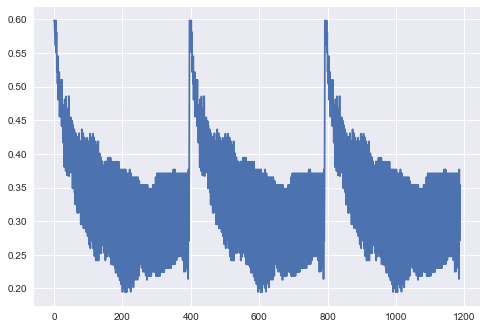

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

# Récupération de tout les scores
scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]

plt.plot(scores);

In [7]:
# warnings.filterwarnings('ignore')

clf_demo = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

clf_demo.fit(source_train, cible_train.values.ravel())


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

In [8]:
warnings.filterwarnings('ignore')

for i in range(0,20):
    print("prédit : ", clf_demo.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])


prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ['Courrir']
prédit :  ['Marcher'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Ne rien faire'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Ne rien faire'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ['Courrir'] 
 attendu :  ['Courrir']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Courrir'] 
 attendu :  ['Courrir']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'assoir (chaise)"] 
 attendu :  ['Marcher']
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Ne rien faire'] 
 attendu :  ["S'allonger (depuis position debout)"]
prédit :  ['

# Dataset ANALYSE

In [9]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed


In [10]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed = train_test_split(source_analysed, cible_analysed, test_size=0.7)


In [11]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (depuis position allongée)    51
Se lever (chaise)                      51
Name: Action, dtype: int64

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
261,15.599289,15.753723,13.986801,15.711823,13.795258,11.930191,16.443253,14.961243,14.481201,19.953156,...,19.500656,15.125244,15.566971,0,0,1,15.788439,33.568985,-1.808929,7.018857
303,15.724991,13.211075,14.348312,13.402618,13.682755,17.256088,16.279251,12.301285,11.228668,22.457489,...,14.603317,17.630768,13.743805,0,0,1,15.415540,23.012939,11.228668,3.163958
487,12.325226,12.024750,12.711884,12.616119,11.472885,11.037155,10.575058,8.451401,12.295288,11.617737,...,10.709137,11.440567,11.688370,0,0,1,11.358324,19.537750,6.573151,2.665945
375,-11.076904,-12.082474,-11.568909,-12.576874,-11.153503,-4.082245,2.668213,-4.003235,-0.542419,1.242462,...,11.207123,14.957642,15.357483,0,0,1,3.163987,17.852234,-12.576874,10.885342
87,13.432541,13.082977,13.177567,13.153625,13.300858,13.091370,13.242203,13.208694,13.164398,13.153625,...,13.231415,13.181137,13.170380,0,0,1,13.198509,13.432541,13.082977,0.074638
373,9.611389,9.286987,8.912308,7.577515,7.200439,6.430695,12.152832,11.715897,15.502335,10.569077,...,12.047485,10.156082,11.231079,0,0,1,9.729370,15.502335,5.528091,2.596874
416,13.626480,13.590561,12.547882,10.329666,12.065460,12.083420,11.859558,11.646469,9.699982,7.870804,...,9.640121,9.945389,9.237915,0,0,1,10.377962,17.952789,3.500198,3.439527
155,-10.611237,-7.820786,-7.164780,-11.999863,-20.153320,-16.866074,-19.645737,-11.025421,-3.963730,-9.470398,...,-11.264847,-11.929230,-17.246750,1,0,0,-13.188345,-3.963730,-26.336349,5.161493
367,12.175598,9.096634,13.821609,13.718658,17.907303,17.985107,6.786240,5.561615,3.124313,3.160217,...,15.404160,12.816040,13.816818,0,0,1,11.094904,18.351440,1.813492,5.179900
110,-12.848618,-39.345230,-0.664505,-5.786911,4.455475,-0.816544,-28.029037,-17.769882,-18.399567,-10.993103,...,10.551132,14.809219,17.997101,0,1,0,-4.115157,17.997101,-39.345230,14.359649


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
553,-9.824738,-10.096466,-9.025070,-9.830719,-9.015503,-9.552994,-10.492722,-11.427643,-9.502716,-7.696289,...,12.946518,13.209869,12.891449,0,0,1,-1.580839,13.209869,-11.427643,9.413452
491,-8.592911,-9.618835,-9.599670,-9.059784,-6.932541,-15.054855,-10.438843,-11.385742,-11.973526,-9.445251,...,11.531540,11.675186,11.542313,0,0,1,-2.641529,11.675186,-15.054855,9.190503
323,9.467743,11.760193,13.710281,14.470444,18.097656,21.177780,19.644302,5.880035,20.686966,9.513229,...,15.000732,28.144913,15.729782,0,0,1,15.285715,28.144913,5.880035,5.863193
533,25.267090,18.137146,23.161377,70.483978,1.672226,-6.955292,0.048950,30.626495,17.804367,11.228668,...,33.224213,-25.268524,-33.965469,0,0,1,14.614857,70.483978,-33.965469,23.177001
178,12.412613,11.573441,13.973633,16.252899,12.884262,11.514786,14.727798,16.154739,16.005112,18.705780,...,13.007568,13.250580,12.921371,0,0,1,13.455286,18.705780,10.978485,1.978914
456,14.520721,15.752518,11.957718,13.059036,11.262192,12.756180,14.626038,14.282486,11.028763,12.436554,...,13.239807,14.572189,14.890610,0,0,1,13.447686,16.177505,11.028763,1.599602
113,-14.578415,-11.368988,-7.628052,-5.285324,-9.025070,-12.220123,-18.346893,-49.358978,-23.458511,5.111496,...,-4.073868,-8.354691,-5.035126,0,1,0,-12.554718,5.111496,-49.358978,12.541374
206,12.054688,11.792511,12.816040,14.665558,10.825256,9.528793,13.244598,17.722946,14.011932,13.665985,...,11.015594,12.696320,13.452896,0,0,1,12.686328,17.722946,9.528793,1.935014
130,11.863144,12.098969,10.055527,7.895966,8.808151,9.016434,10.457748,13.457672,13.014755,12.957275,...,13.748581,12.215103,14.070602,0,0,1,11.855662,14.223831,7.895966,1.854702
376,-9.333908,-9.597275,-10.971558,-9.870209,-12.271591,-10.618408,-6.537491,-3.736298,-1.407913,3.555267,...,8.397537,11.490845,11.890686,0,0,1,1.450525,16.221802,-12.271591,9.719990


,Action
261,Sauter
303,Courrir
487,S'allonger (depuis position assise)
375,Se lever (depuis position allongée)
87,Ne rien faire
373,Se lever (depuis position allongée)
416,S'allonger (depuis position assise)
155,Marcher
367,Se lever (depuis position allongée)
110,Sauter


,Action
553,S'assoir (depuis position allongée)
491,S'assoir (depuis position allongée)
323,Courrir
533,Courrir
178,S'assoir (chaise)
456,Marcher
113,Sauter
206,Se lever (chaise)
130,S'assoir (chaise)
376,Se lever (depuis position allongée)


In [12]:
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'n_neighbors': np.array(range (1,100)),
    'weights':['uniform','distance'],
    'p':[1,2],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]
scores = ['accuracy']

warnings.filterwarnings('ignore')

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed.fit(source_train_analysed, cible_train_analysed.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed, cible_pred_analysed = cible_test_analysed, clf_analysed.predict(source_test_analysed)
    print(classification_report(cible_true_analysed, cible_pred_analysed))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbor

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform ...

[CV] algorithm=ball_tree, n_neighbors=8, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=8, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=8, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=8, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=8, p=2, weights=uniform -   0

[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=12, p=1, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=15, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, p=1, weights=uni

[CV] algorithm=ball_tree, n_neighbors=19, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=19, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=19, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=19, p=2, weights=distanc

[CV]  algorithm=ball_tree, n_neighbors=23, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=23, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=23, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=23, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=23, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=23, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=23, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=23, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=23, p=2, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=26, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=26, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=26, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=26, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=26, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=27, p=1, weights=unifo

[CV]  algorithm=ball_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=30, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=30, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=30, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=30, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=30, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=30, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=30, p=2, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=34, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=34, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=34, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, p=1, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=37, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=37, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=37, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=37, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=38, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=38, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=38, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=38, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=38, p=1, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=41, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=41, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=41, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=41, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=41, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=41, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=41, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, p=2, weights=unifo

[CV]  algorithm=ball_tree, n_neighbors=44, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=44, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=44, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=44, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=44, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=44, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=45, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=45, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=45, p=1, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=47, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=47, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=47, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=47, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=47, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=48, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=48, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=48, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=48, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=48, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=48, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=48, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=48, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=48, p=1, weights=unifo

[CV]  algorithm=ball_tree, n_neighbors=51, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=51, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=51, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=51, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=51, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=51, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=51, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=51, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=51, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=51, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=51, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=51, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=51, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=51, p=1, weights=dist

[CV]  algorithm=ball_tree, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=54, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=54, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=2, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=58, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=58, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=58, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=58, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=58, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=58, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=58, p=1, weights=unif

[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=64, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=64, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=64, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=unifo

[CV]  algorithm=ball_tree, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=67, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=67, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=67, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=67, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=67, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=67, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=67, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=67, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=67, p=2, weights=distan

[CV] algorithm=ball_tree, n_neighbors=70, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=70, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=70, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=70, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=70, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=70, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=70, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=70, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=70, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=70, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=70, p=2, weights=distanc

[CV]  algorithm=ball_tree, n_neighbors=73, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=73, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=73, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=73, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=73, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=73, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=73, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=73, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=73, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=73, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=73, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=73, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=73, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=73, p=2, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=76, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=76, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=76, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=76, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=76, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=76, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=76, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=76, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=76, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=77, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=77, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=77, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=77, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=77, p=1, weights=uni

[CV] algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=80, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=80, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=80, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=80, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=80, p=1, weights=distance

[CV] algorithm=ball_tree, n_neighbors=83, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=83, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=83, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=83, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=83, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=83, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=83, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=83, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=83, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=83, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=83, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=2, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=2, weights=unif

[CV]  algorithm=ball_tree, n_neighbors=92, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=92, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=92, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=92, p=2, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=95, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=95, p=2, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=98, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=98, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=98, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=98, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=98, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=98, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=98, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=98, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=98, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=98, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=98, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=98, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=98, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=1, weights=uni

[CV] algorithm=kd_tree, n_neighbors=2, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=2, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=2, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=2, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform -   0.0s
[CV] a

[CV] . algorithm=kd_tree, n_neighbors=6, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=1, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=6, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=1, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=6, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=1, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=6, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=1, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=6, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=1, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=6, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=6, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=2, weights=uniform ..........
[CV] .

[CV]  algorithm=kd_tree, n_neighbors=9, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2, weights=distance .........
[CV]  

[CV]  algorithm=kd_tree, n_neighbors=12, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=12, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=12, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=12, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=12, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=12, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=13, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=13, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=13, p=1, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=distance ........
[C

[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=23, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=23, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=23, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=2, weights=uniform .........
[C

[CV]  algorithm=kd_tree, n_neighbors=26, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=26, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=26, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=26, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=26, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, p=1, weights=uniform .........
[CV

[CV]  algorithm=kd_tree, n_neighbors=30, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=30, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=30, p=2, weights=distance ........
[CV]

[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=distance -   0.0s
[CV

[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=distance ........
[CV

[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=distance ........
[C

[CV]  algorithm=kd_tree, n_neighbors=46, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=46, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=46, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=46, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=46, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=46, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=46, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=2, weights=distance ........
[CV

[CV]  algorithm=kd_tree, n_neighbors=49, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=49, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=49, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=49, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=49, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=49, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=49, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=49, p=2, weights=distance ........
[CV

[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=52, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=52, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=52, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=52, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=53, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=53, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=53, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=53, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=53, p=1, weights=uniform .........
[

[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=56, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=56, p=1, weights=distance -   0.0s
[CV

[CV]  algorithm=kd_tree, n_neighbors=59, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=59, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=59, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=59, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=59, p=2, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=62, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=62, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=62, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=62, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=62, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=63, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=63, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=63, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=63, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=63, p=1, weights=uniform .........
[CV

[CV]  algorithm=kd_tree, n_neighbors=66, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=66, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=66, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=66, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=66, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=66, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=66, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=66, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=66, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=66, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=66, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=66, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=66, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=66, p=1, weights=distance ........
[CV

[CV]  algorithm=kd_tree, n_neighbors=71, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=71, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=71, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=71, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=71, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=71, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=71, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform .........
[C

[CV] algorithm=kd_tree, n_neighbors=75, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=75, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=75, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=75, p=1, weights=distance -   0.0s
[CV

[CV]  algorithm=kd_tree, n_neighbors=78, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=78, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=78, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=78, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=78, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=78, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=78, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=78, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=78, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=78, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=78, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=78, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=78, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=78, p=1, weights=distance ........
[C

[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=81, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=81, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=81, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=81, p=2, weights=uniform -   0.0s
[

[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=84, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=84, p=2, weights=distance ........
[C

[CV]  algorithm=kd_tree, n_neighbors=87, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=87, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=87, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=87, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=87, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=88, p=1, weights=uniform .........
[CV

[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=91, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=91, p=1, weights=distance -   0.0s
[

[CV]  algorithm=kd_tree, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=94, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=94, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=2, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=distance ........
[CV

[CV] algorithm=brute, n_neighbors=2, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=2, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=2, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=2, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=2, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=2, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=2, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=2, p=1, weights=distance -   0.0s
[CV] a

[CV] .. algorithm=brute, n_neighbors=5, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=5, p=2, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=5, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=5, p=2, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=5, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=5, p=2, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=5, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=uniform ............
[CV] .

[CV] .. algorithm=brute, n_neighbors=9, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=9, p=2, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=9, p=2, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=9, p=2, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=9, p=2, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=9, p=2, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=9, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=9, p=2, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=9, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=9, p=2, weights=distance ...........
[CV] .

[CV] algorithm=brute, n_neighbors=13, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=13, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=13, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=13, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=13, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=13, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=13, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=13, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=13, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=13, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=13, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=13, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=13, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=13, p=2, weights=uniform -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=17, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=17, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=17, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=17, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=17, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=17, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=17, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=17, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=17, p=1, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=20, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=20, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=20, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=20, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=20, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=20, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=20, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=20, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=20, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=20, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=20, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=20, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=20, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=20, p=2, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=24, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=24, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=24, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=24, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=24, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=24, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=24, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=24, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=24, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=24, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=24, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=24, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=24, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=24, p=1, weights=distance -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=27, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=27, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=27, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=27, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=27, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=27, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=27, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=27, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=27, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=27, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=27, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=27, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=27, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=27, p=2, weights=distance ..........
[CV] .

[CV] .. algorithm=brute, n_neighbors=30, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=30, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=31, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=31, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=31, p=1, weights=uniform ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=34, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=34, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=distance ..........
[CV] .

[CV] . algorithm=brute, n_neighbors=37, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=37, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=37, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=37, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=37, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=37, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=37, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=uniform ...........
[CV] .

[CV] . algorithm=brute, n_neighbors=40, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=40, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=40, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=1, weights=distance ..........
[CV] .

[CV] . algorithm=brute, n_neighbors=44, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=44, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=44, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=44, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=44, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=44, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=44, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=44, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=44, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=44, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=44, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=44, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=44, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=44, p=2, weights=distance ..........
[CV] .

[CV] .. algorithm=brute, n_neighbors=47, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=47, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=47, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=47, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=47, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=47, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=47, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=47, p=2, weights=distance ..........
[CV] .

[CV] . algorithm=brute, n_neighbors=50, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=51, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=51, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=51, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=51, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=51, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=51, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=51, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=51, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=51, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=51, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=51, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=51, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=51, p=1, weights=distance ..........
[CV] .

[CV] .. algorithm=brute, n_neighbors=54, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=54, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=54, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=54, p=2, weights=uniform ...........
[CV] .

[CV] algorithm=brute, n_neighbors=60, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=63, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=63, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=63, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=63, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=63, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=63, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=63, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=63, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=63, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=63, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=63, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=63, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=63, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=63, p=1, weights=distance -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=66, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=66, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=66, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=66, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=66, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=66, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=66, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=66, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=66, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=66, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=66, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=66, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=66, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=66, p=2, weights=uniform ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=69, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=69, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=69, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=69, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=69, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=69, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=69, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=69, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=69, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=69, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=69, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=69, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=69, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=70, p=1, weights=uniform ...........
[CV] .

[CV] algorithm=brute, n_neighbors=75, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=75, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=75, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=75, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=75, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=75, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=75, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=75, p=2, weights=uniform -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=79, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=79, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=79, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=79, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=79, p=1, weights=uniform ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=distance ..........
[CV] .

[CV] .. algorithm=brute, n_neighbors=85, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=85, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=85, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=85, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=85, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=85, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=85, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=2, weights=uniform ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=91, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=91, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=91, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=91, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=91, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=91, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=91, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=91, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=91, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=91, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=91, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=91, p=1, weights=distance ..........
[CV] .

[CV] algorithm=brute, n_neighbors=94, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=94, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=94, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=94, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=94, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=94, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=94, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=94, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=94, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=94, p=2, weights=uniform -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=97, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=97, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=97, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=97, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done 5940 out of 5940 | elapsed:   18.4s finished


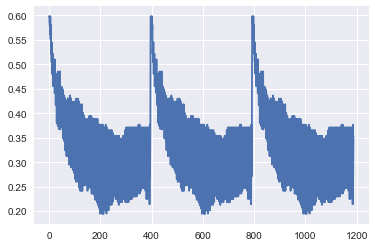

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

# Récupération de tout les scores
scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]

plt.plot(scores);

In [14]:
# TODO copier coller le best classifier
#clf_analysed_demo = 

#clf_analysed_demo.fit(source_train_analysed, cible_train_analysed.values.ravel())



In [15]:

#for i in range(0,20):
#    print("prédit : ", clf_analysed_demo.predict(source_test_analysed.values[i]),"\n attendu : ",cible_test_analysed.values[i])



# Dataset ANALYSE 2

In [16]:

# Récupération des données analysé sans les données brutes (DONNEES ANALYSEES 2)
%store -r colonnes_source_analysed_2
%store -r colonnes_cible_analysed_2
%store -r source_analysed_2
%store -r cible_analysed_2


In [17]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2 = train_test_split(source_analysed_2, cible_analysed_2, test_size=0.7)


In [18]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (depuis position allongée)    51
Se lever (chaise)                      51
Name: Action, dtype: int64

,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
457,0,0,1,13.087476,18.091660,9.298950,2.146941
433,0,0,1,6.267594,25.866837,-11.080490,11.958557
75,0,0,1,13.076165,18.264038,8.919464,2.061694
450,0,0,1,13.566557,58.740417,-8.713837,17.350247
282,0,0,1,11.277882,17.557755,3.834198,3.622327
368,0,0,1,11.184805,17.417679,4.219666,3.065622
203,0,0,1,12.935387,14.676346,11.712311,0.905637
315,0,0,1,14.357724,22.259979,0.505066,4.762260
127,0,1,0,12.537110,74.105194,-38.197220,27.973370
424,0,0,1,-1.908125,13.707870,-16.735596,10.641826


,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
244,0,0,1,13.962921,42.736374,-5.815643,13.954090
241,0,0,1,14.005115,21.266373,10.115372,2.736527
153,1,0,0,12.844225,16.946030,8.818909,1.953671
325,0,0,1,15.095675,26.023651,11.199951,3.557498
229,0,0,1,12.322411,14.462051,9.200790,1.374051
499,0,0,1,4.478288,13.385864,-8.480392,7.394686
169,0,0,1,13.052286,16.462402,11.043137,1.621227
387,0,0,1,6.870155,21.512970,-13.417236,10.148383
288,0,0,1,11.620731,16.000320,9.398315,1.802820
311,0,0,1,13.220895,26.916687,1.102402,6.577299


,Action
457,Marcher
433,S'assoir (depuis position allongée)
75,Marcher
450,Sauter
282,S'allonger (depuis position debout)
368,Se lever (depuis position allongée)
203,S'assoir (chaise)
315,Courrir
127,Courrir
424,S'assoir (depuis position allongée)


,Action
244,Sauter
241,Se lever (chaise)
153,Marcher
325,Courrir
229,Se lever (chaise)
499,S'assoir (depuis position allongée)
169,S'assoir (chaise)
387,Se lever (depuis position allongée)
288,S'allonger (depuis position debout)
311,Courrir


In [19]:
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'n_neighbors': np.array(range (1,100)),
    'weights':['uniform','distance'],
    'p':[1,2],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]
scores = ['accuracy']

warnings.filterwarnings('ignore')


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed_2 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed_2.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed_2.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed_2.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed_2, cible_pred_analysed_2 = cible_test_analysed_2, clf_analysed_2.predict(source_test_analysed_2)
    print(classification_report(cible_true_analysed_2, cible_pred_analysed_2))
    
    
    print()
    
    

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbor

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=1, weights=distance -  

[CV]  algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=7, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=7, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=7, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=7, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=7, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=7, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=7, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=7, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=7, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=7, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=8, p=1, weights=uniform ...

[CV]  algorithm=ball_tree, n_neighbors=10, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=11, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=11, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=14, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=14, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=14, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=14, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=14, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=14, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=14, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, p=2, weights=uni

[CV] algorithm=ball_tree, n_neighbors=17, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=17, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=17, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=17, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=17, p=2, weights=distance

[CV]  algorithm=ball_tree, n_neighbors=20, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=20, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=20, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=20, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=20, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=21, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=21, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=21, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, p=1, weights=unif

[CV]  algorithm=ball_tree, n_neighbors=24, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=24, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=24, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=24, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=24, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=24, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=24, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, p=2, weights=dist

[CV]  algorithm=ball_tree, n_neighbors=28, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=28, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=28, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=28, p=2, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=31, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=31, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=31, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=31, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=32, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=32, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=32, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=32, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=32, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=32, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=32, p=1, weights=unif

[CV]  algorithm=ball_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=36, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=36, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=36, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=36, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, p=2, weights=dist

[CV] algorithm=ball_tree, n_neighbors=40, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=40, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=40, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=40, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=40, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=40, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=40, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=40, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=40, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=40, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=40, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=40, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=40, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=40, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=43, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=43, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=43, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=43, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=43, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=43, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=43, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=43, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=43, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, p=1, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=47, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=47, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=47, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=47, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=47, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=47, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=47, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=47, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=47, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=47, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=50, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=50, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=50, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=50, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=50, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=50, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=50, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=50, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=50, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=50, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=50, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=50, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=50, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=50, p=2, weights=unifo

[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=53, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=53, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=54, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=54, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=54, p=1, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=57, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=57, p=2, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=61, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=61, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=61, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=61, p=2, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=64, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=64, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=65, p=1, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=68, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=68, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=68, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=68, p=2, weights=uni

[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=71, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=71, p=2, weights=distance

[CV]  algorithm=ball_tree, n_neighbors=74, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=75, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=75, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=75, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=78, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=78, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=78, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=78, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=78, p=2, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=82, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=82, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=82, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=82, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=82, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=82, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=82, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=82, p=2, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=85, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=85, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=85, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=85, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=85, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=86, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=86, p=1, weights=unif

[CV]  algorithm=ball_tree, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=89, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=89, p=2, weights=unif

[CV]  algorithm=ball_tree, n_neighbors=92, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=93, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=93, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=93, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=93, p=1, weights=distan

[CV]  algorithm=ball_tree, n_neighbors=96, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=96, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=96, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=96, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=96, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=96, p=1, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=96, p=1, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=96, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=96, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=96, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=96, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=96, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=96, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=96, p=2, weights=unif

[CV]  algorithm=ball_tree, n_neighbors=99, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=99, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=2, weights=uniform .......
[CV]  algorithm=ball_tree, n_neighbors=99, p=2, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=99, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=99, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=99, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=2, weights=distance ......
[CV]  algorithm=ball_tree, n_neighbors=99, p=2, weights=distance -   0.0s
[CV] algorithm=ball_tree, n_neighbors=99, p=2, weights=dist

[CV] algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=4, p=2, weights=distance -   0.0s
[CV] a

[CV] . algorithm=kd_tree, n_neighbors=8, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=8, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=2, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=8, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=8, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=8, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=8, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=2, weights=distance .........
[CV]  algorithm=kd_tree, n_neighbors=8, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=8, p=2, weights=distance .........
[CV]  

[CV]  algorithm=kd_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=12, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=12, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=12, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=12, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=12, p=2, weights=uniform .........
[C

[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=15, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=16, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, p=1, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=19, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=19, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=19, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform .........
[CV

[CV]  algorithm=kd_tree, n_neighbors=22, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=23, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=23, p=1, weights=distance ........
[CV]

[CV] algorithm=kd_tree, n_neighbors=28, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=28, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=28, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=28, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=28, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=28, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=28, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=28, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=28, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=28, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=28, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=28, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=28, p=2, weights=uniform -   0.0s
[C

[CV]  algorithm=kd_tree, n_neighbors=33, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=33, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=33, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=33, p=2, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=36, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=36, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=36, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=36, p=2, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=39, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=39, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=39, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=39, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, p=2, weights=uniform .........
[C

[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=43, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=43, p=1, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=45, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=45, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=46, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=46, p=1, weights=distance ........
[CV]

[CV] algorithm=kd_tree, n_neighbors=51, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=51, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=51, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=51, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=51, p=2, weights=distance -   0.0s
[CV]

[CV]  algorithm=kd_tree, n_neighbors=54, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=54, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=54, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=54, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=54, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=54, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=54, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=54, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=54, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=54, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=54, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=54, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=54, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=54, p=2, weights=distance ........
[CV

[CV]  algorithm=kd_tree, n_neighbors=58, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=58, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=58, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=58, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=58, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=58, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=58, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=58, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=58, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=58, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=58, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=58, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=58, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=58, p=1, weights=distance ........
[C

[CV]  algorithm=kd_tree, n_neighbors=61, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=61, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=61, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=61, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=61, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=61, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=61, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=61, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=61, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=61, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=61, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=62, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=62, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=62, p=1, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=65, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=65, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=65, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=65, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=65, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=65, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=65, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=65, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=65, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=65, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=65, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=65, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=65, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=65, p=2, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=68, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=68, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=68, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=68, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=68, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=68, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=68, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=68, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=68, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=68, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=68, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=69, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=69, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=69, p=1, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=72, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=72, p=1, weights=distance ........
[CV

[CV]  algorithm=kd_tree, n_neighbors=75, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=75, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=75, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=75, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=75, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=75, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=76, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=76, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=76, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=76, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=76, p=1, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=79, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=79, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=79, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=79, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=79, p=2, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=83, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=83, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=83, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=83, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=83, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=83, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=83, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=83, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=83, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=83, p=1, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=86, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=86, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=86, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=86, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=86, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=86, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=86, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=86, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=86, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=86, p=2, weights=distance ........
[CV]

[CV]  algorithm=kd_tree, n_neighbors=90, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=90, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=90, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=90, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=90, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=90, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=90, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=90, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=90, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=90, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=90, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=90, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=90, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=90, p=2, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=93, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=93, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=93, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=93, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=93, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=93, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=93, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=93, p=2, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=93, p=2, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=94, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=1, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=94, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=94, p=1, weights=uniform .........
[

[CV]  algorithm=kd_tree, n_neighbors=97, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=1, weights=distance ........
[CV]  algorithm=kd_tree, n_neighbors=97, p=1, weights=distance -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform .........
[CV]  algorithm=kd_tree, n_neighbors=97, p=2, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=97, p=2, weights=distance ........
[CV]

[CV] ... algorithm=brute, n_neighbors=2, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=2, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=2, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=2, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=2, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=2, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=2, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=2, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=2, p=2, weights=uniform ............
[CV] .

[CV] .. algorithm=brute, n_neighbors=6, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=6, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=6, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=1, weights=distance ...........
[CV] .. algorithm=brute, n_neighbors=6, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=2, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=2, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=2, weights=uniform ............
[CV] ... algorithm=brute, n_neighbors=6, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=6, p=2, weights=uniform ............
[CV] .

[CV] algorithm=brute, n_neighbors=10, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=10, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=10, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=10, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=10, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=10, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=10, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=10, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=10, p=2, weights=uniform -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=14, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=14, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=14, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=14, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=14, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=14, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=14, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=14, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=14, p=2, weights=uniform -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=18, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=18, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=18, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=18, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=18, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=18, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=18, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=18, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=18, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=18, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=18, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=18, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=18, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=18, p=2, weights=uniform ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=22, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=22, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=22, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=22, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=22, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=22, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=22, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=22, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=22, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=22, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=22, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=22, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=22, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=22, p=1, weights=distance ..........
[CV] .

[CV] .. algorithm=brute, n_neighbors=26, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=26, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=26, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=26, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=26, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=26, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=26, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=26, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=26, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=26, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=26, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=26, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=26, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=26, p=1, weights=distance ..........
[CV] .

[CV] algorithm=brute, n_neighbors=29, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=29, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=30, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=30, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=30, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=30, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=30, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=30, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=30, p=1, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=33, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=33, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=33, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=33, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=33, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=33, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=34, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=34, p=1, weights=uniform -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=37, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=37, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=37, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=37, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=37, p=2, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=41, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=41, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=41, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=41, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=41, p=2, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=45, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=45, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=45, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=45, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=45, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=45, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=45, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=45, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=45, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=45, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=45, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=45, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=45, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=45, p=2, weights=uniform -   0.0s
[CV] a

[CV] .. algorithm=brute, n_neighbors=49, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=49, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=49, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=49, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=49, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=49, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=49, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=49, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=49, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=49, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=49, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=49, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=49, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=49, p=1, weights=distance ..........
[CV] .

[CV] . algorithm=brute, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=52, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=52, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=52, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=52, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=53, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=53, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=53, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=53, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=53, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=53, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=53, p=1, weights=uniform ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=56, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=56, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=56, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=56, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=56, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=56, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=56, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=56, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=56, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=56, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=56, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=56, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=56, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=56, p=2, weights=distance ..........
[CV] .

[CV] algorithm=brute, n_neighbors=60, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=60, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=60, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=60, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=60, p=2, weights=uniform -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=63, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=63, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=63, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=63, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=64, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=64, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=64, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=64, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=64, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=64, p=1, weights=uniform -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=67, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=67, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=67, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=67, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=67, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=67, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=67, p=2, weights=distance -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=71, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=71, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=71, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=71, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=71, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=71, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=71, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=71, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=71, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=71, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=71, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=71, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=71, p=2, weights=uniform ...........
[CV] .

[CV] . algorithm=brute, n_neighbors=74, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=74, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=74, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=75, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=75, p=1, weights=distance ..........
[CV] .

[CV] algorithm=brute, n_neighbors=78, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=78, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=78, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=78, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=78, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=78, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=78, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=78, p=2, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=82, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=82, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=82, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=82, p=1, weights=distance -   0.0s
[CV] a

[CV] .. algorithm=brute, n_neighbors=85, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=85, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=85, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=85, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=85, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=85, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=85, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=85, p=2, weights=distance ..........
[CV] .

[CV] algorithm=brute, n_neighbors=89, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=89, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=89, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=89, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=89, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=89, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=89, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=89, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=89, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=89, p=1, weights=distance -   0.0s
[CV] a

[CV] algorithm=brute, n_neighbors=92, p=2, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=92, p=2, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=92, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=92, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=92, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=92, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=92, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=92, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=92, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=92, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=92, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=92, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=93, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=93, p=1, weights=uniform -   0.0s
[CV] a

[CV] . algorithm=brute, n_neighbors=95, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=95, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=95, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=95, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=95, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=95, p=2, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=95, p=2, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=96, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=96, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=96, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=96, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=96, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=96, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=96, p=1, weights=uniform ...........
[CV] .

[CV] .. algorithm=brute, n_neighbors=99, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=99, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=99, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=99, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=99, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=99, p=1, weights=uniform ...........
[CV] .. algorithm=brute, n_neighbors=99, p=1, weights=uniform -   0.0s
[CV] algorithm=brute, n_neighbors=99, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=99, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=99, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=99, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=99, p=1, weights=distance ..........
[CV] . algorithm=brute, n_neighbors=99, p=1, weights=distance -   0.0s
[CV] algorithm=brute, n_neighbors=99, p=1, weights=distance ..........
[CV] .

0.550 (+/-0.022) for {'algorithm': 'ball_tree', 'n_neighbors': 44, 'p': 1, 'weights': 'distance'}
0.284 (+/-0.016) for {'algorithm': 'ball_tree', 'n_neighbors': 44, 'p': 2, 'weights': 'uniform'}
0.521 (+/-0.019) for {'algorithm': 'ball_tree', 'n_neighbors': 44, 'p': 2, 'weights': 'distance'}
0.308 (+/-0.016) for {'algorithm': 'ball_tree', 'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}
0.556 (+/-0.023) for {'algorithm': 'ball_tree', 'n_neighbors': 45, 'p': 1, 'weights': 'distance'}
0.284 (+/-0.016) for {'algorithm': 'ball_tree', 'n_neighbors': 45, 'p': 2, 'weights': 'uniform'}
0.521 (+/-0.019) for {'algorithm': 'ball_tree', 'n_neighbors': 45, 'p': 2, 'weights': 'distance'}
0.278 (+/-0.031) for {'algorithm': 'ball_tree', 'n_neighbors': 46, 'p': 1, 'weights': 'uniform'}
0.550 (+/-0.020) for {'algorithm': 'ball_tree', 'n_neighbors': 46, 'p': 1, 'weights': 'distance'}
0.278 (+/-0.017) for {'algorithm': 'ball_tree', 'n_neighbors': 46, 'p': 2, 'weights': 'uniform'}
0.521 (+/-0.019) for {'al

[Parallel(n_jobs=1)]: Done 5940 out of 5940 | elapsed:   17.4s finished


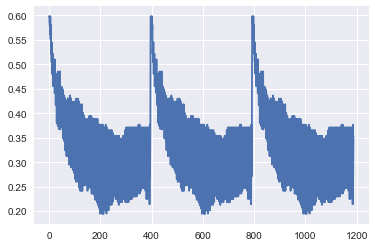

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

# Récupération de tout les scores
scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]

plt.plot(scores);

In [21]:
# TODO copier coller le best classifier
#clf_analysed_2_demo = 

#clf_analysed_2_demo.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())



In [22]:

#for i in range(0,20):
#    print("prédit : ", clf_analysed_2_demo.predict(source_test_analysed_2.values[i]),"\n attendu : ",cible_test_analysed_2.values[i])
